# Question 2: Datascience with Pandas and Movie Data

0. Access some historical IMDB data files from the shared drive: 

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [35]:
data_dir = "./" #https://drive.google.com/drive/folders/1dl6nw0HO9XVrT8dSBJHHn3mDW9EWQpXS?usp=sharing

basics = pd.read_csv(data_dir+"/title.basics.tsv.gz", sep='\t')
basics.head()


/home/ulrich/venv/datascience/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [3]:
# Check dataframe summary
basics.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5330276 entries, 0 to 5330275
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   tconst          5330276 non-null  object
 1   titleType       5330276 non-null  object
 2   primaryTitle    5330270 non-null  object
 3   originalTitle   5330270 non-null  object
 4   isAdult         5330276 non-null  int64 
 5   startYear       5330276 non-null  object
 6   endYear         5330276 non-null  object
 7   runtimeMinutes  5330276 non-null  object
 8   genres          5330274 non-null  object
dtypes: int64(1), object(8)
memory usage: 366.0+ MB


In [ ]:
# trying to find a data type for each column
for col in basics.columns:
    print(basics[col].unique())

In [4]:
akas = pd.read_csv(data_dir+"/title.akas.tsv.gz", sep='\t')

akas.head()

/home/ulrich/venv/datascience/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0
2,tt0000001,3,Carmencita,US,\N,\N,\N,0
3,tt0000001,4,Carmencita,\N,\N,original,\N,1
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1


In [5]:
# Check dataframe summary
akas.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3423660 entries, 0 to 3423659
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   titleId          3423660 non-null  object
 1   ordering         3423660 non-null  int64 
 2   title            3423660 non-null  object
 3   region           3423605 non-null  object
 4   language         3423660 non-null  object
 5   types            3423660 non-null  object
 6   attributes       3423660 non-null  object
 7   isOriginalTitle  3423660 non-null  object
dtypes: int64(1), object(7)
memory usage: 209.0+ MB


In [ ]:
# trying to find a data type for each column
for col in akas.columns:
    print(akas[col].unique())

In [6]:
ratings = pd.read_csv(data_dir+"/title.ratings.tsv.gz", sep='\t')

ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.8,1422
1,tt0000002,6.4,168
2,tt0000003,6.6,1015
3,tt0000004,6.4,100
4,tt0000005,6.2,1713


In [7]:
# Check dataframe summary
ratings.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874203 entries, 0 to 874202
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         874203 non-null  object 
 1   averageRating  874203 non-null  float64
 2   numVotes       874203 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 20.0+ MB


In [ ]:
# trying to find a data type for each column
for col in ratings.columns:
    print(ratings[col].unique())

In [8]:
print(akas.shape)
print(ratings.shape)
print(basics.shape)

(3423660, 8)
(874203, 3)
(5330276, 9)


### Drop duplicates in all the dataframes

In [9]:
basics.drop_duplicates(subset ="tconst",
                     keep = False, inplace = True)
akas.drop_duplicates(subset ="titleId",
                     keep = False, inplace = True)
ratings.drop_duplicates(subset ="tconst",
                     keep = False, inplace = True)

In [ ]:
basics.shape

In [ ]:
akas.shape

In [ ]:
ratings.shape

### 3. Merging the dataframes

In [10]:
# rename tconst to titleId
basics = basics.rename(columns={'tconst':'titleId'})
ratings = ratings.rename(columns={'tconst':'titleId'})

In [11]:
from functools import reduce

dfs = [basics, akas, ratings]

df_inner = reduce(lambda left,right: pd.merge(left,right,on=['titleId'], how='inner'), dfs)
df_outer = reduce(lambda left,right: pd.merge(left,right,on=['titleId'], how='outer'), dfs)

In [12]:
print("inner produces shape: ",df_inner.shape)
print("outer produces shape: ",df_outer.shape)

inner produces shape:  (376260, 18)
outer produces shape:  (5333998, 18)


In [13]:
print(f"inner produces {len(df_inner.titleType.unique())} unique titleTypes")
print(f"outer produces {len(df_outer.titleType.unique())} unique titleTypes")

inner produces 10 unique titleTypes
outer produces 11 unique titleTypes


In [ ]:
df_inner.head()

In [ ]:
df_outer.head()

4. Make a new dataframe from step 3 by selecting only rows corresponding to English-language films ('en') OR US-region films ('US') AND only those that are movies (using the 'titleType' column). Put the resulting data into a new dataframe; call it df_new. 


In [ ]:
df_outer.titleType.unique()

In [ ]:
df_outer.region.unique()

In [ ]:
df_outer.language.unique()

In [14]:
df_new = df_inner[((df_inner["language"]=="en") | (df_inner['region']=="US")) & (df_inner["titleType"].isin(['movie', 'tvMovie']))]
df_outer_new = df_outer[((df_outer["language"]=="en") | (df_outer['region']=="US")) & (df_outer["titleType"].isin(['movie', 'tvMovie']))]

In [15]:
df_new.head()

,titleId,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,ordering,title,region,language,types,attributes,isOriginalTitle,averageRating,numVotes
119,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy",1,The Fairylogue and Radio-Plays,US,\N,\N,\N,0,5.9,26
231,tt0001159,movie,The Connecticut Yankee,The Connecticut Yankee,0,1910,\N,\N,\N,1,The Connecticut Yankee,US,\N,\N,\N,0,5.7,6
241,tt0001230,movie,Gentleman Joe,Gentleman Joe,0,1910,\N,\N,\N,1,Gentleman Joe,US,\N,\N,\N,0,5.0,6
271,tt0001482,movie,As in a Looking Glass,As in a Looking Glass,0,1911,\N,\N,Drama,1,As in a Looking Glass,US,\N,\N,\N,0,5.5,25
287,tt0001586,movie,A Dog's Tale,A Dog's Tale,0,1911,\N,\N,\N,1,A Dog's Tale,US,\N,\N,\N,0,4.5,6


5. Add a new column to df_new with column title 'log10Votes' which gives the Log_10 number of the 'numVotes' column.

In [16]:
df_new["log10Votes"] = np.log10(df_new["numVotes"].values)

/home/ulrich/venv/datascience/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [ ]:
df_new.head()

Lower the case of all text in the 'genres' column. 

In [17]:
df_new["genres"] = df_new["genres"].str.lower()

In [ ]:
df_new.head()

6. Using Groupby (or other technique) group all data by 'genres' and display the top 10 highest genres by:

In [18]:
# Grouping the data by genres
df_group = df_new.groupby(['genres']).mean()

In [19]:
df_group.nlargest(10, 'log10Votes')

,isAdult,ordering,averageRating,numVotes,log10Votes
genres,,,,,
"action,documentary,sci-fi",0.0,1.0,7.2,4073.0,3.609914
"animation,crime,music",0.0,1.0,7.0,1485.0,3.171726
"animation,documentary,mystery",0.0,1.0,8.2,883.0,2.945961
"action,fantasy,musical",0.0,1.0,7.7,822.0,2.914872
"animation,fantasy,horror",0.0,1.0,4.1,749.0,2.874482
"music,sci-fi",0.0,1.0,5.7,719.0,2.856729
"family,horror,mystery",0.0,1.0,4.0,636.0,2.803457
"family,history",0.0,1.0,6.5,573.0,2.758155
"animation,comedy,musical",0.0,1.0,5.9,537.5,2.727610


In [20]:
df_group.nlargest(10, 'averageRating')

,isAdult,ordering,averageRating,numVotes,log10Votes
genres,,,,,
"action,crime,family",0.0,1.0,9.2,21.0,1.322219
"history,sport",0.0,1.0,9.2,5.0,0.698970
"comedy,music,talk-show",0.0,1.0,9.1,71.5,1.580983
"adventure,musical",0.0,1.0,9.0,5.0,0.698970
"adventure,biography,crime",0.0,1.0,8.9,41.0,1.612784
"action,adventure,reality-tv",0.0,1.0,8.8,13.0,1.113943
"action,animation,biography",0.0,1.0,8.8,214.0,2.330414
"documentary,news,reality-tv",0.0,1.0,8.8,8.0,0.903090
"family,musical,romance",0.0,1.0,8.8,15.0,1.176091


7. Using ‘groupby’ group all data by averageRating and make a scatter plot of averageRating vs log10Votes. 

In [21]:
# Grouping the data by genres
df_group_rating = df_new.groupby(['averageRating']).mean()

In [ ]:
df_group_rating.head()

In [ ]:
df_group_rating.columns

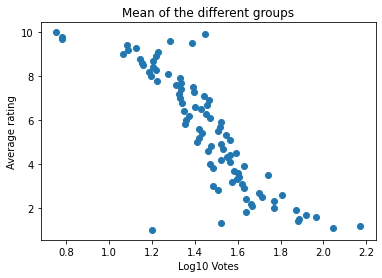

In [22]:
plt.scatter(df_group_rating["log10Votes"], df_group_rating.index)
plt.xlabel("Log10 Votes")
plt.ylabel("Average rating")
plt.title("Mean of the different groups")
plt.show()

### 8. Perform linear regression on your data (averageRating vs log10Votes) created in the previous step in three different ways:

<ol>
    <li>8.1 Using sklearn</li> 
    <li>8.2 Using scipy</li> 
    <li>8.3 Using pytorch</li> 
</ol>

In [23]:
# x-values for the regression will be the Average rating and y-values will be log 10 votes.
y = np.array(df_group_rating.index)
x = np.array(df_group_rating["log10Votes"])

Using sklearn

In [24]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x.reshape(-1,1), y)
sklearn_m ,sklearn_c = regr.coef_[0], regr.intercept_

print(f"Slope and intercept from sklearn linear regression are {sklearn_m} and {sklearn_c}.")

Slope and intercept from sklearn linear regression are -8.797407986808285 and 18.28903908329238.


Using scipy

In [25]:
from scipy.stats import linregress
result = linregress(x, y)
scipy_m, scipy_c = result.slope, result.intercept

print(f"Slope and intercept from scipy stats linear regression are {scipy_m} and {scipy_c}.")

Slope and intercept from scipy stats linear regression are -8.797407986808283 and 18.289039083292376.


Using pytorch

In [26]:
import torch
from torch.autograd import Variable

x_data = Variable(torch.Tensor(x.reshape(-1,1)))
y_data = Variable(torch.Tensor(y))

In [27]:
class LinearRegressionModel(torch.nn.Module):
 
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1, bias=True)  # One in and one out
 
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [29]:
model = LinearRegressionModel()
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-2)


In [30]:
# for small dataset we will just use one batch
EPOCH = 20000
for epoch in range(EPOCH):
 
    # Forward pass: Compute predicted y by passing
    # x to the model
    pred_y = model(x_data)
 
    # Compute and print loss
    loss = loss_fn(pred_y, y_data)
 
    # Zero gradients, perform a backward pass,
    # and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch %1000 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item(), model.))

/home/ulrich/venv/datascience/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([91])) that is different to the input size (torch.Size([91, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch 0, loss 28.041685104370117
epoch 1000, loss 7.117005825042725
epoch 2000, loss 7.028670787811279
epoch 3000, loss 6.950400352478027
epoch 4000, loss 6.910277843475342
epoch 5000, loss 6.900720596313477
epoch 6000, loss 6.900008201599121
epoch 7000, loss 6.90000057220459
epoch 8000, loss 6.900000095367432
epoch 9000, loss 6.900000095367432
epoch 10000, loss 6.900000095367432
epoch 11000, loss 6.900000095367432
epoch 12000, loss 6.900000095367432
epoch 13000, loss 6.900000095367432
epoch 14000, loss 6.900000095367432
epoch 15000, loss 6.900000095367432
epoch 16000, loss 6.900000095367432
epoch 17000, loss 6.900000095367432
epoch 18000, loss 6.900000095367432
epoch 19000, loss 6.900000095367432


In [33]:
model.linear.weight.grad
model.linear.bias.grad

tensor([0.0064])

In [ ]:
yp = model(x_data)

In [ ]:
yp

In [ ]:
y_data

In [ ]:
linregress?